# Practical Application III: Comparing Classifiers

## Bank Marketing Data Analysis

This notebook compares the performance of various classifiers (K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines) on a bank marketing dataset. The goal is to predict whether a client will subscribe to a term deposit.

## 1. Business Understanding

### Business Objective
Banks conduct direct marketing campaigns to promote their products, one of which is term deposits. The objective of this analysis is to develop a model that can predict whether a client will subscribe to a term deposit based on information collected during marketing calls and other client data. This can help the bank target their marketing efforts more effectively by focusing on clients who are more likely to subscribe.

### Success Criteria
- Build a model that accurately predicts whether a client will subscribe to a term deposit
- Compare different machine learning algorithms to identify the most effective approach
- Provide insights on the key factors that influence a client's decision to subscribe

## 2. Data Understanding

The dataset contains information about bank clients, details of the contact made during the marketing campaign, other campaign information, and social and economic context attributes.

### Data Loading and Initial Exploration

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# For reproducibility
np.random.seed(42)

In [2]:
# Load the data
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Rename unclear variable names with snake_case for better readability
column_mapping = {
    'emp.var.rate': 'employment_var_rate',
    'cons.price.idx': 'consumer_price_idx',
    'cons.conf.idx': 'consumer_conf_idx',
    'euribor3m': 'euribor_3m',
    'nr.employed': 'num_employees',
    'day_of_week': 'weekday'
}

# Apply renaming
df.rename(columns=column_mapping, inplace=True)

# Display the first few rows
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,weekday,duration,campaign,pdays,previous,poutcome,employment_var_rate,consumer_price_idx,consumer_conf_idx,euribor_3m,num_employees,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [25]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   job                  41188 non-null  object 
 2   marital              41188 non-null  object 
 3   education            41188 non-null  object 
 4   default              41188 non-null  object 
 5   housing              41188 non-null  object 
 6   loan                 41188 non-null  object 
 7   contact              41188 non-null  object 
 8   month                41188 non-null  object 
 9   weekday              41188 non-null  object 
 10  duration             41188 non-null  int64  
 11  campaign             41188 non-null  int64  
 12  pdays                41188 non-null  int64  
 13  previous             41188 non-null  int64  
 14  poutcome             41188 non-null  object 
 15  employment_var_rate  41188 non-null 

In [4]:
# Statistical summary of numerical features
df.describe()

,age,duration,campaign,pdays,previous,employment_var_rate,consumer_price_idx,consumer_conf_idx,euribor_3m,num_employees
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Target variable distribution:
y
no     36548
yes     4640
Name: count, dtype: int64
Percentage of 'yes': 11.27%


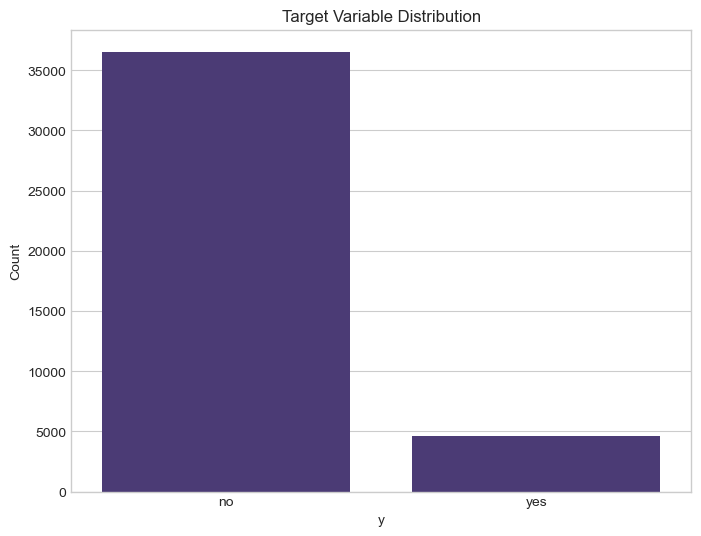

In [5]:
# Count of each category in the target variable
print("Target variable distribution:")
target_counts = df['y'].value_counts()
print(target_counts)
print(f"Percentage of 'yes': {target_counts['yes'] / len(df) * 100:.2f}%")

# Visualize target distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='y')
plt.title('Target Variable Distribution')
plt.ylabel('Count')
plt.show()

### Exploring the categorical features

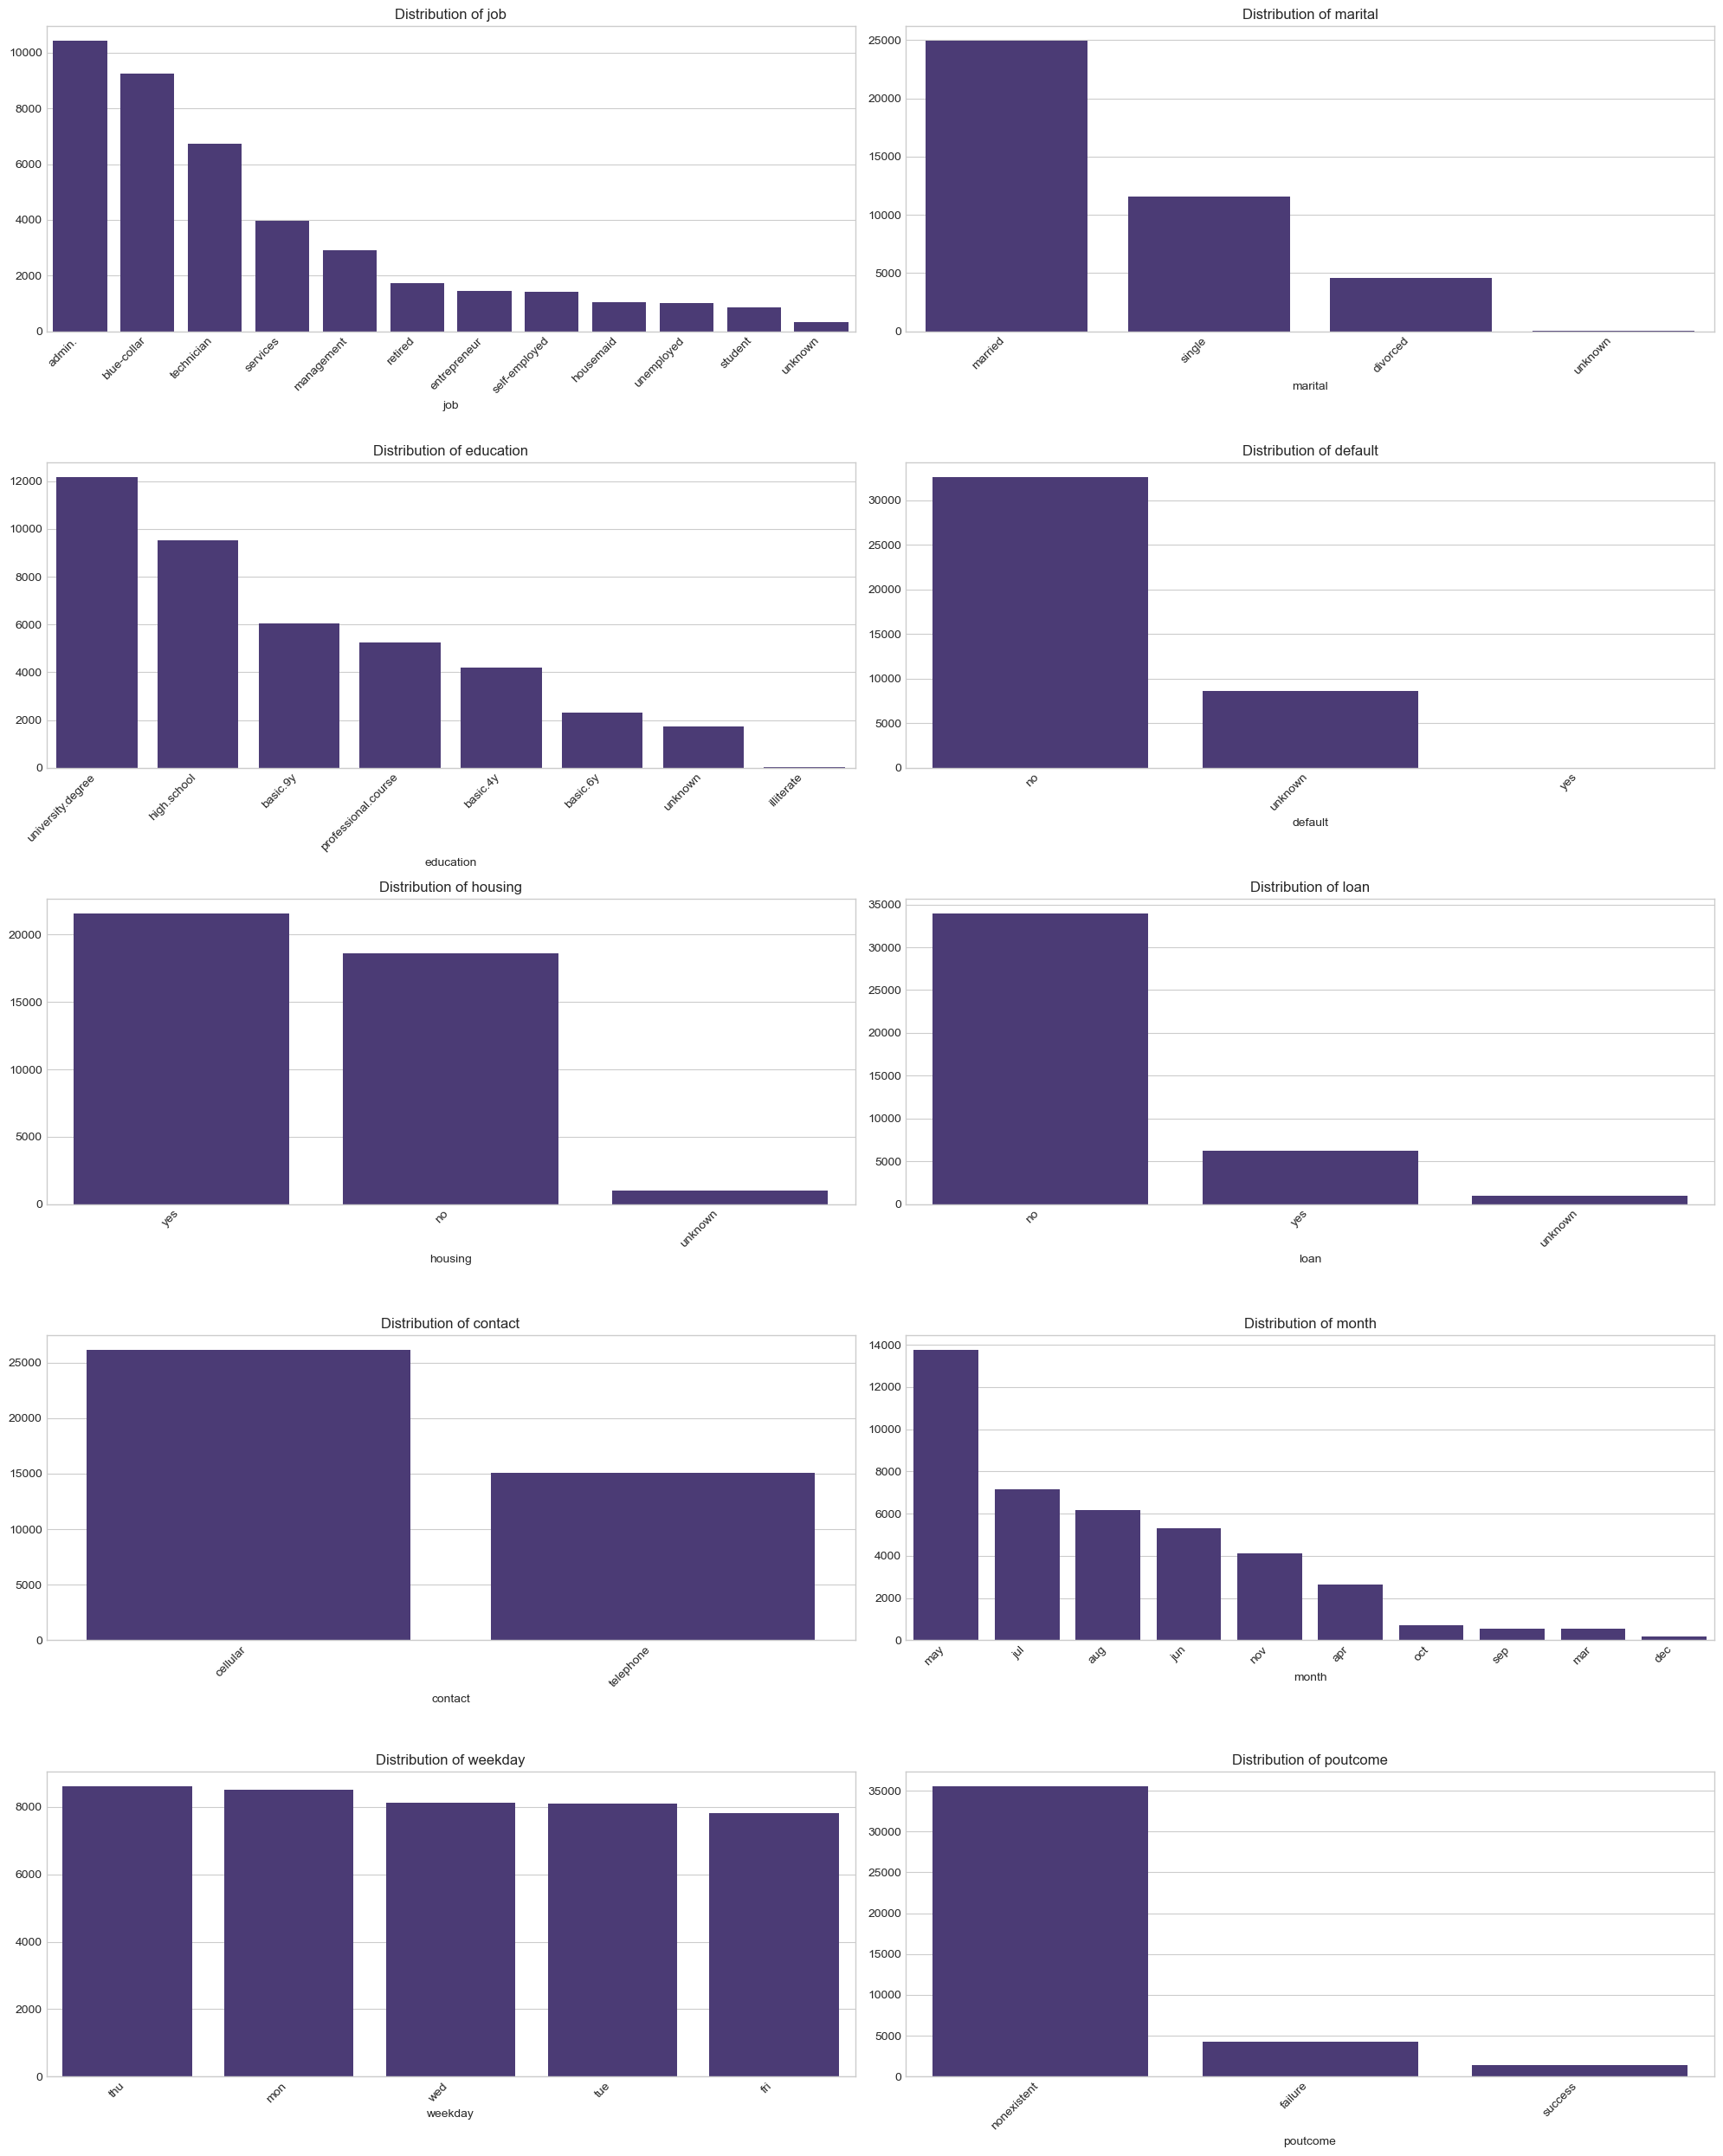

In [6]:
# List of categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                        'contact', 'month', 'weekday', 'poutcome']

# Plot the distribution of categorical features
plt.figure(figsize=(20, 25))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    feat_counts = df[feature].value_counts().sort_values(ascending=False)
    sns.barplot(x=feat_counts.index, y=feat_counts.values)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
plt.show()

### Exploring the numerical features

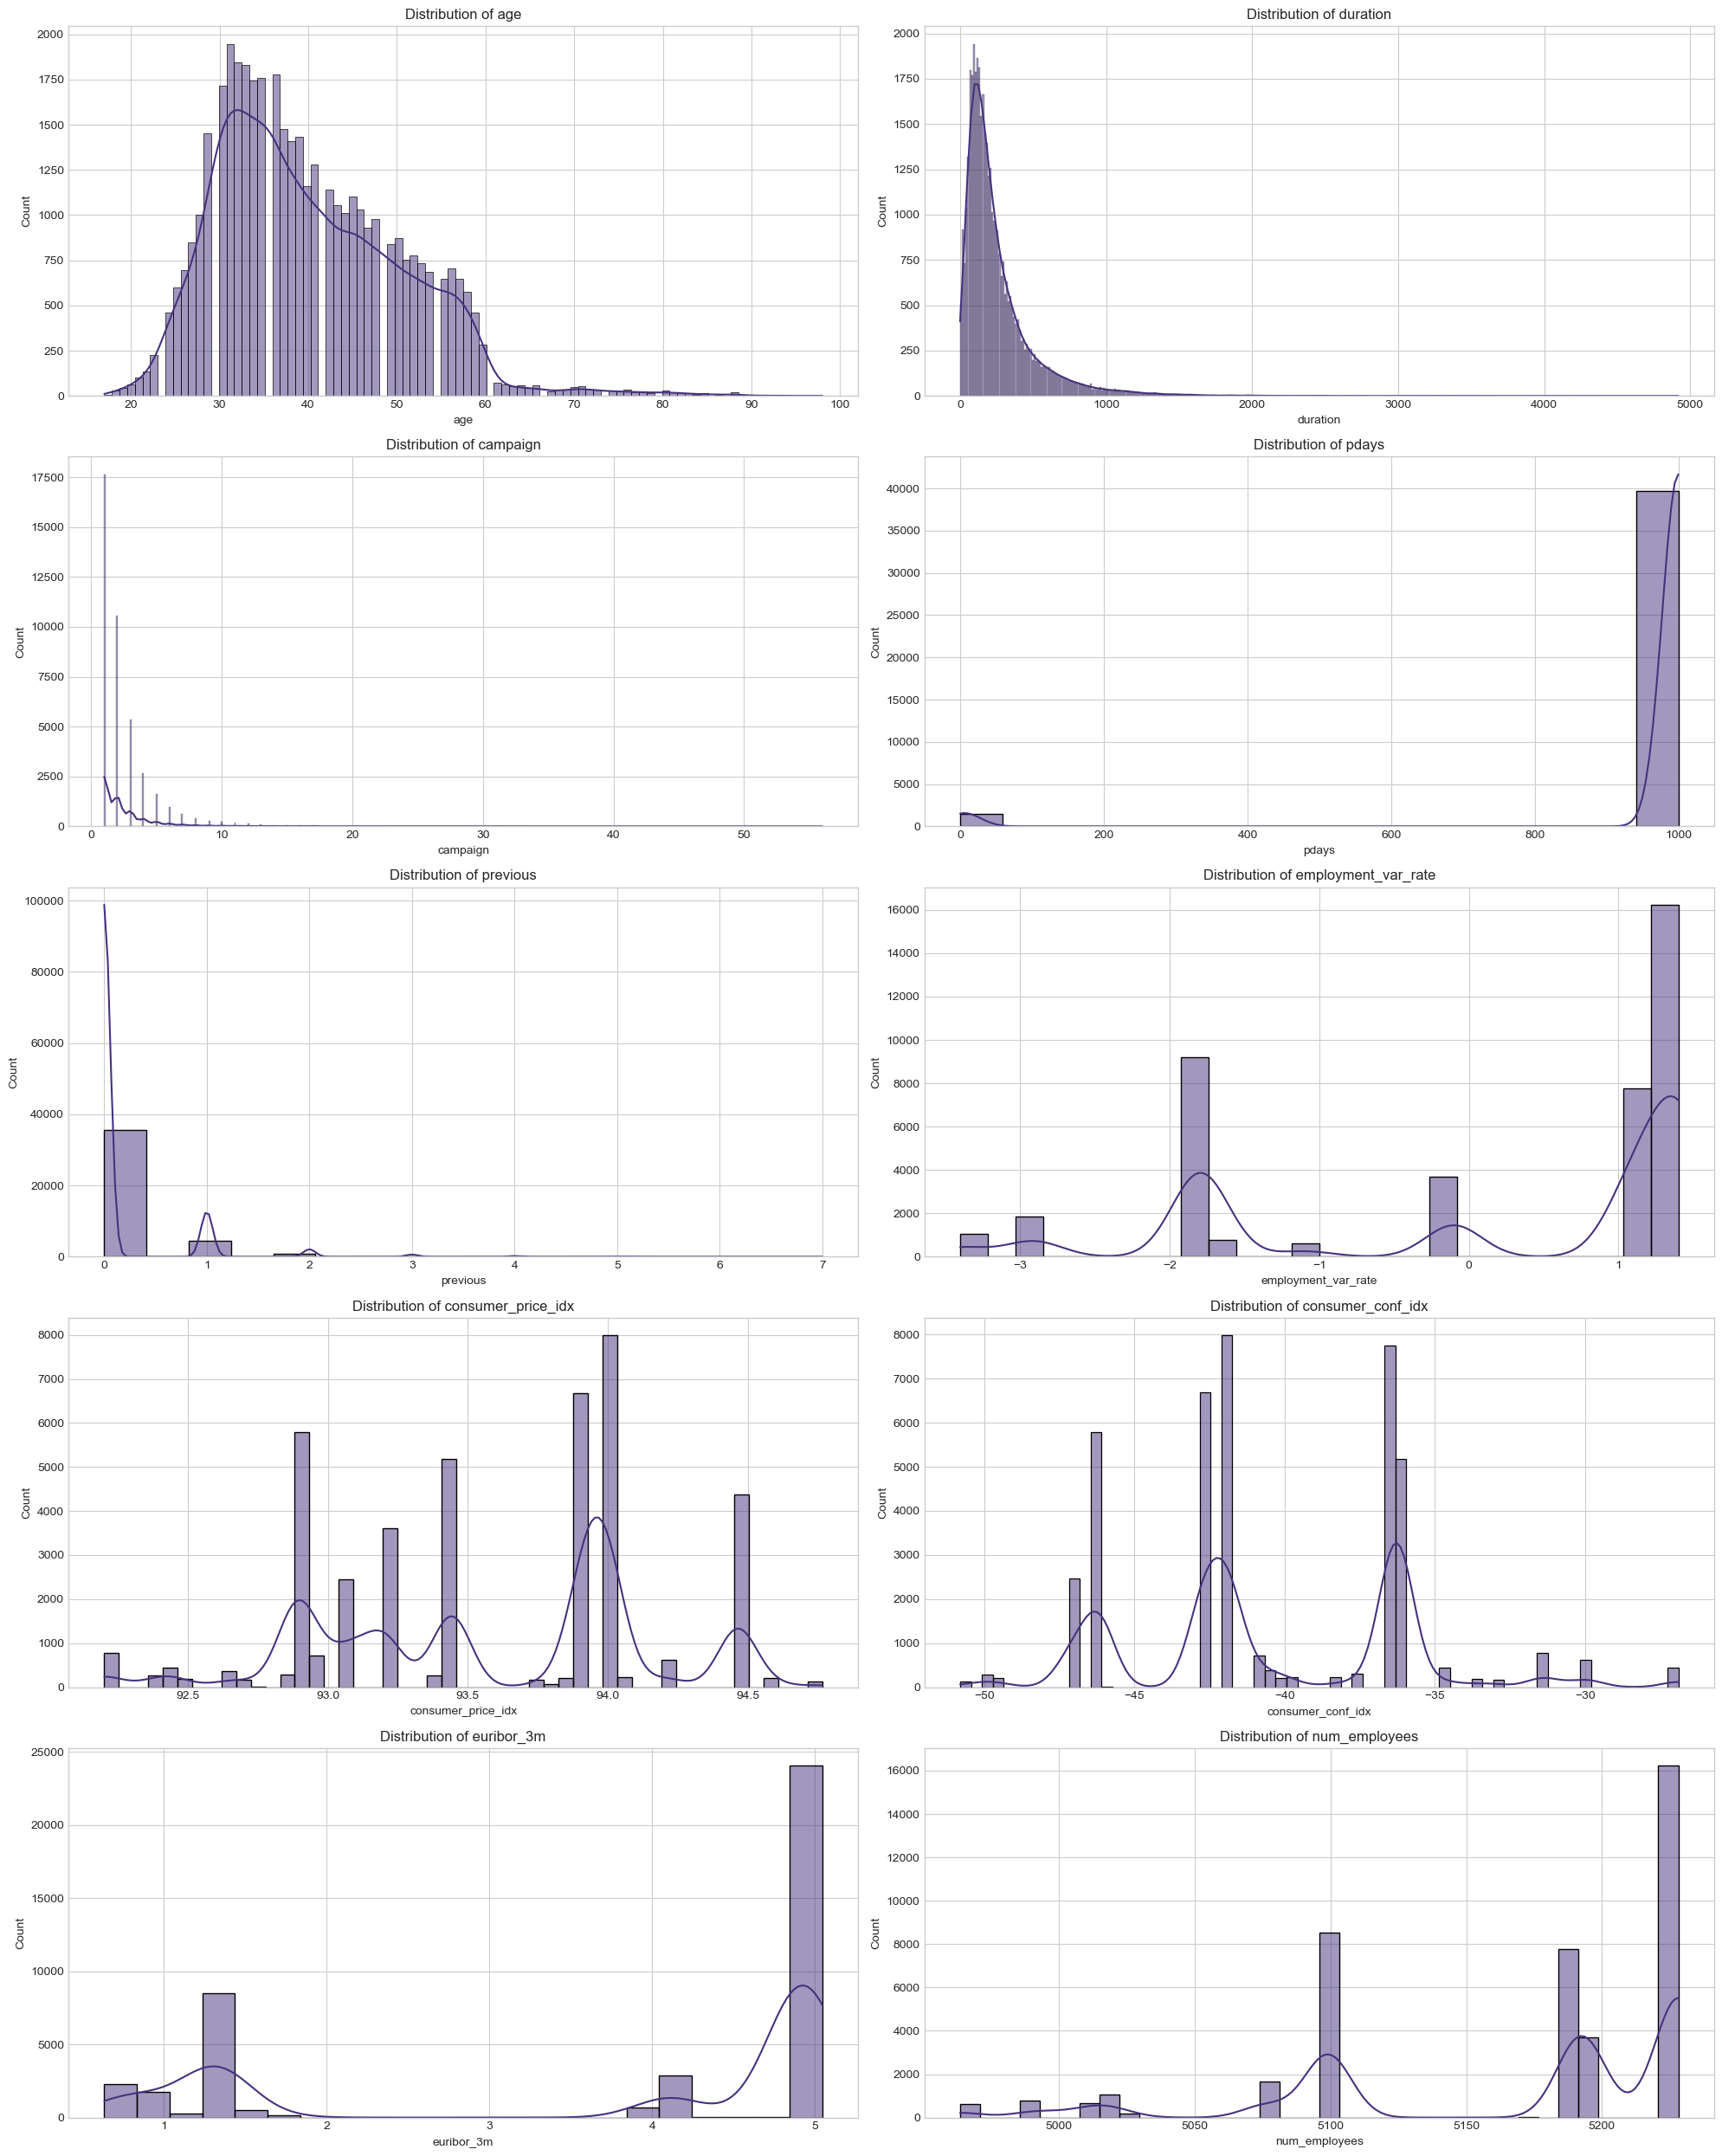

In [7]:
# List of numerical features with updated names
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                      'employment_var_rate', 'consumer_price_idx', 'consumer_conf_idx', 
                      'euribor_3m', 'num_employees']

# Plot histograms for numerical features
plt.figure(figsize=(20, 25))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.show()

### Relationship between features and target variable

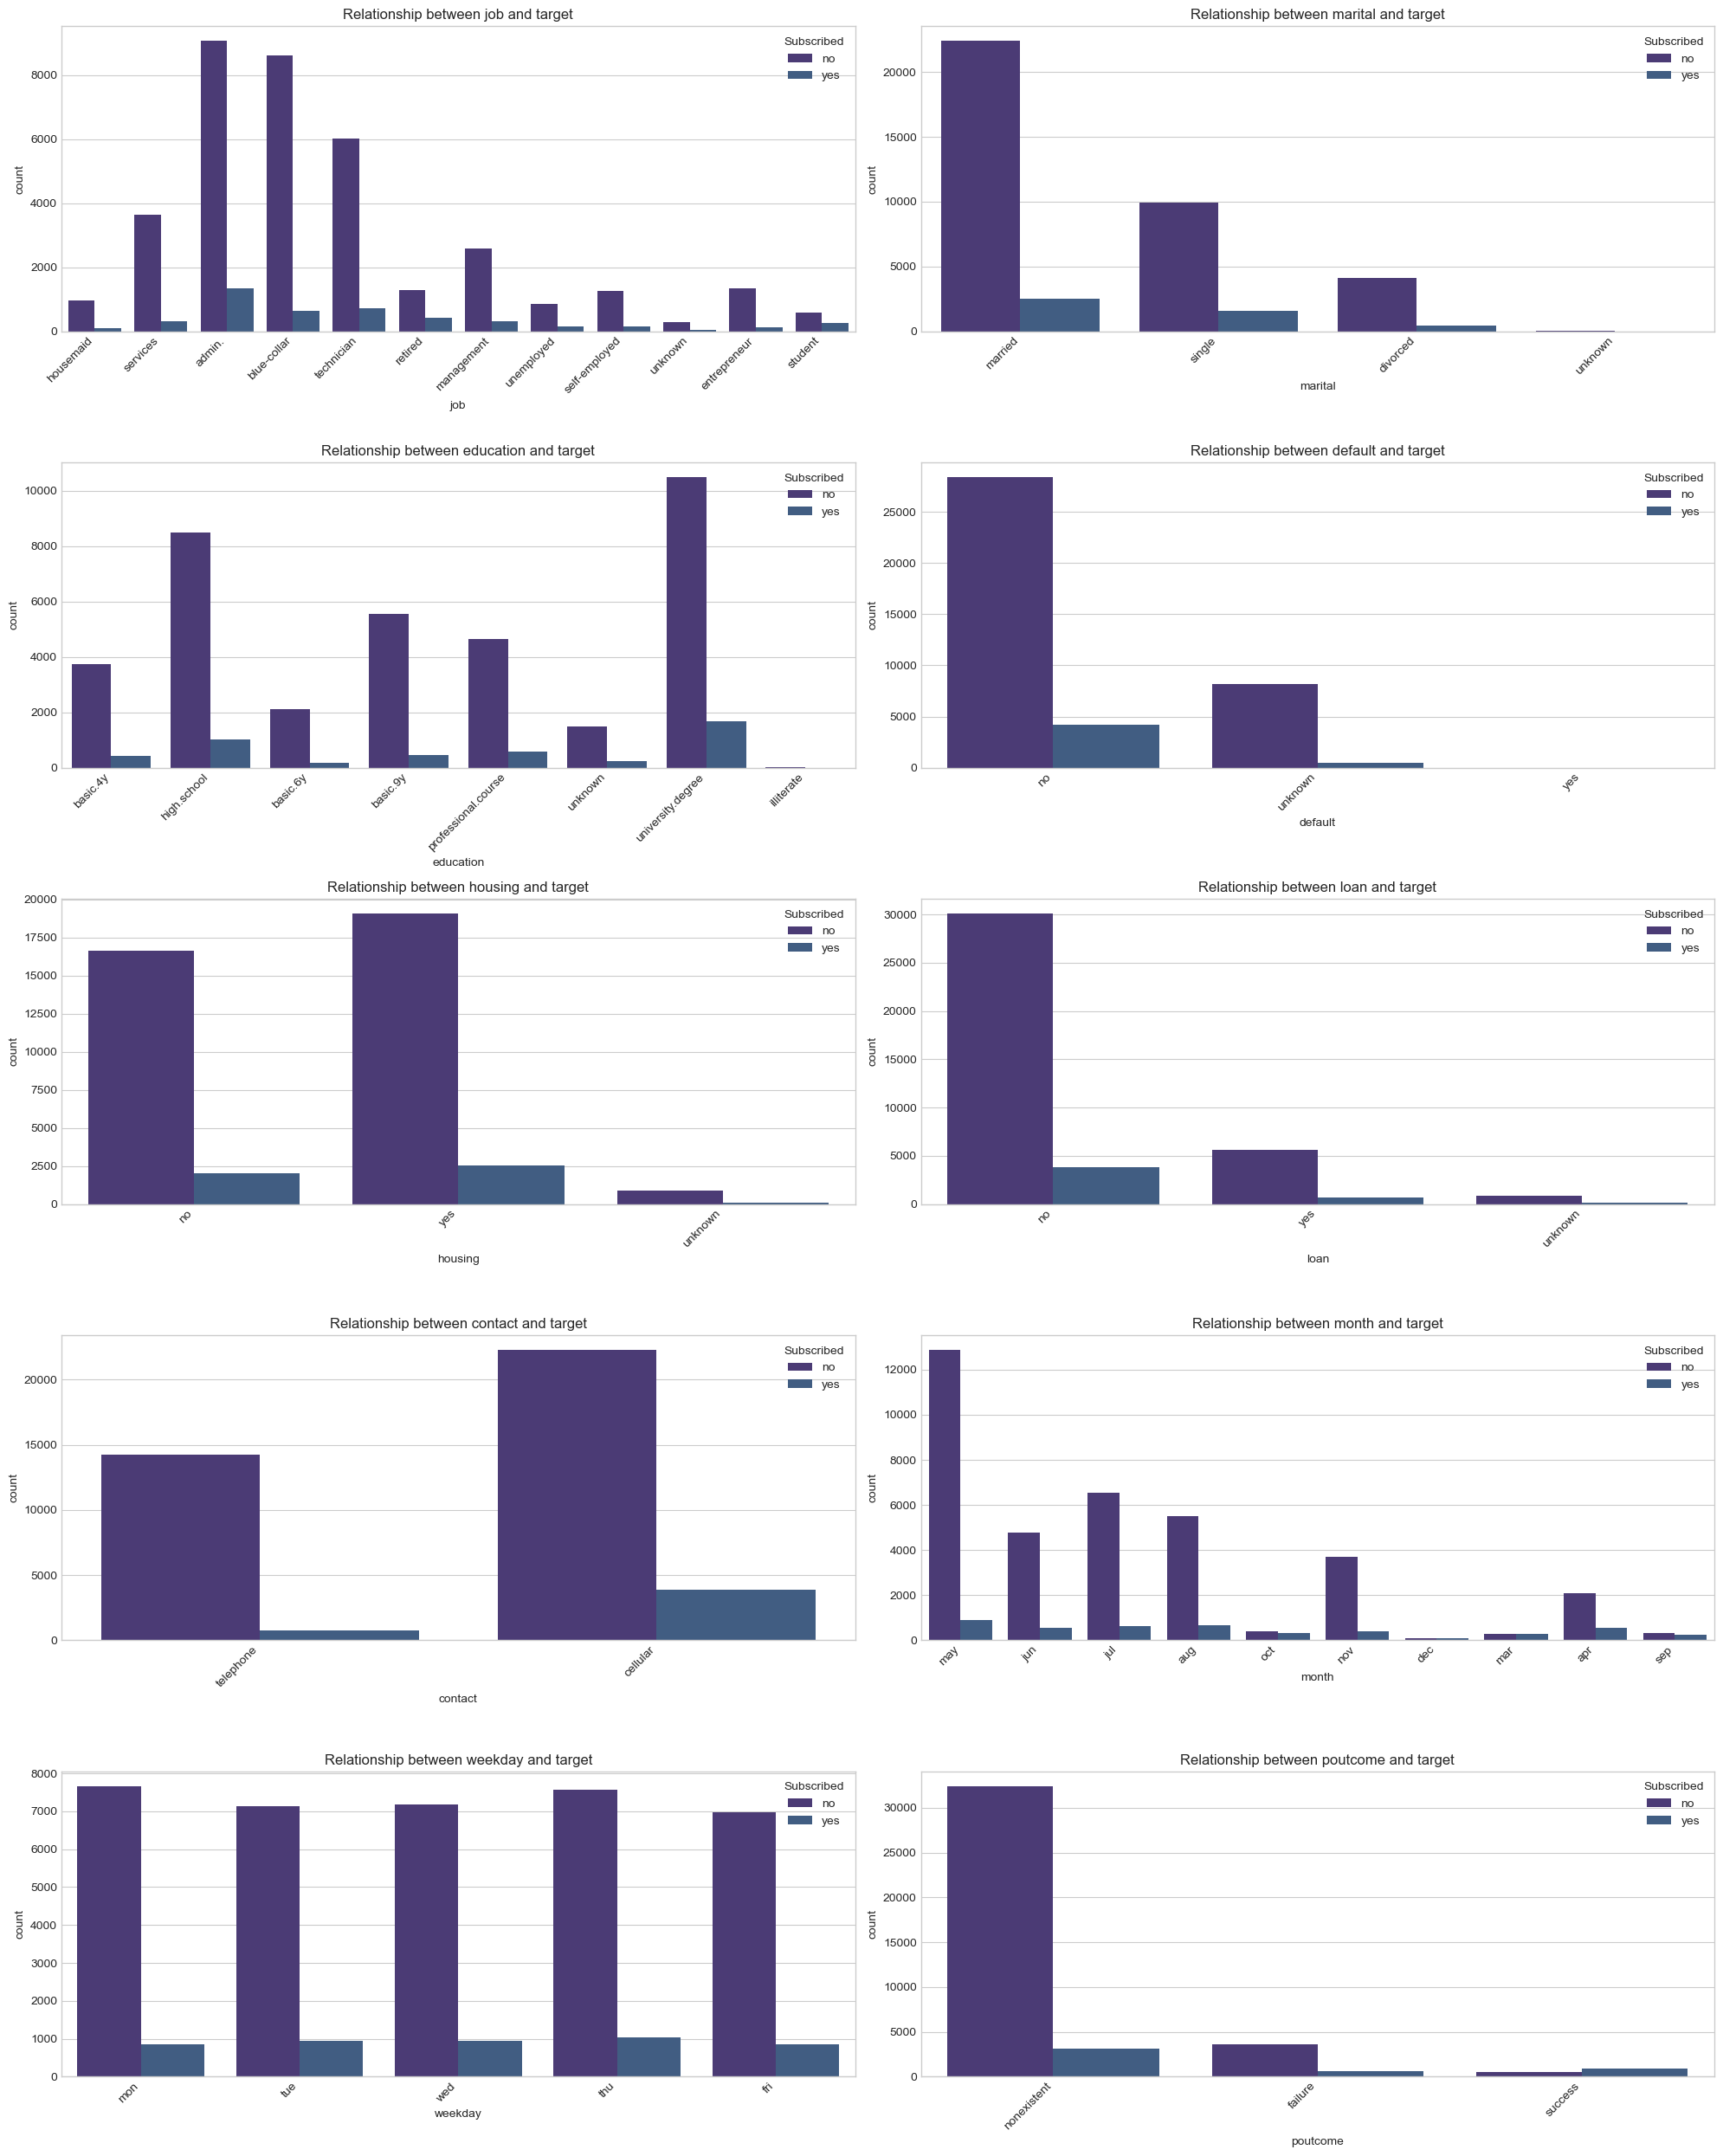

In [8]:
# Analyze relationship between categorical features and target
plt.figure(figsize=(20, 25))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=feature, hue='y')
    plt.title(f'Relationship between {feature} and target')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Subscribed', loc='upper right')
    plt.tight_layout()
plt.show()

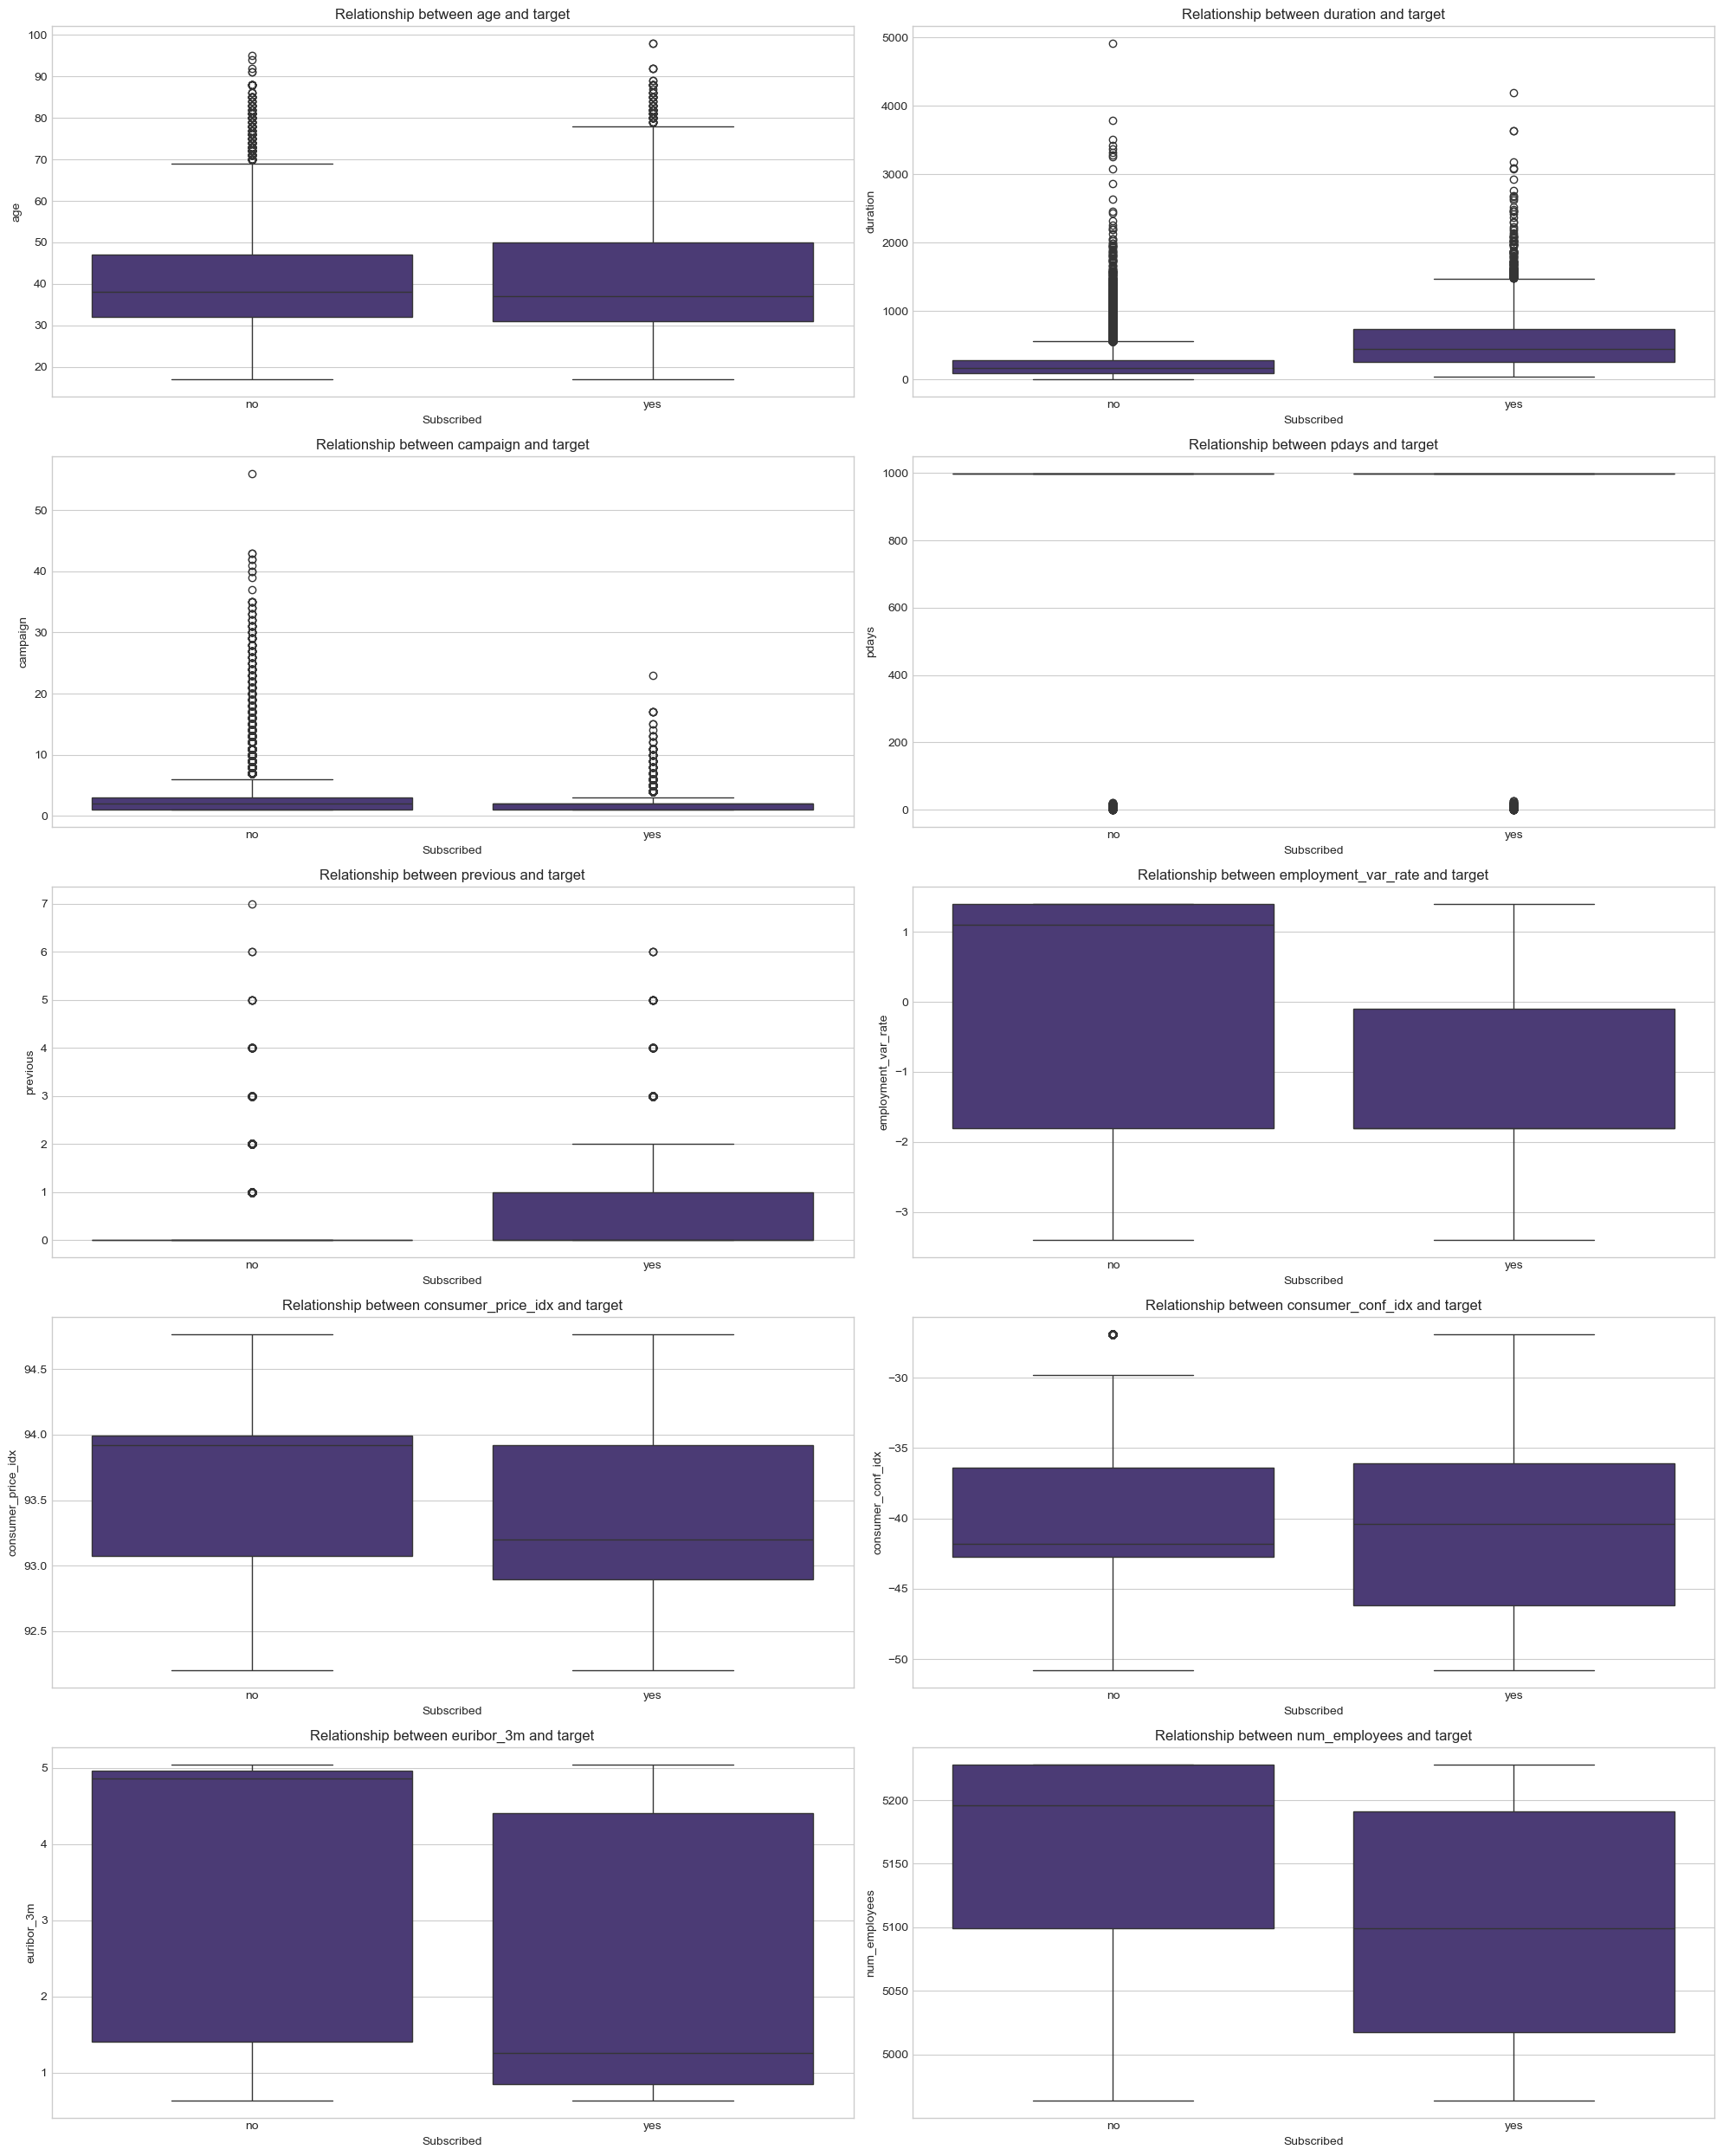

In [9]:
# Analyze relationship between numerical features and target
plt.figure(figsize=(20, 25))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(data=df, x='y', y=feature)
    plt.title(f'Relationship between {feature} and target')
    plt.xlabel('Subscribed')
    plt.tight_layout()
plt.show()

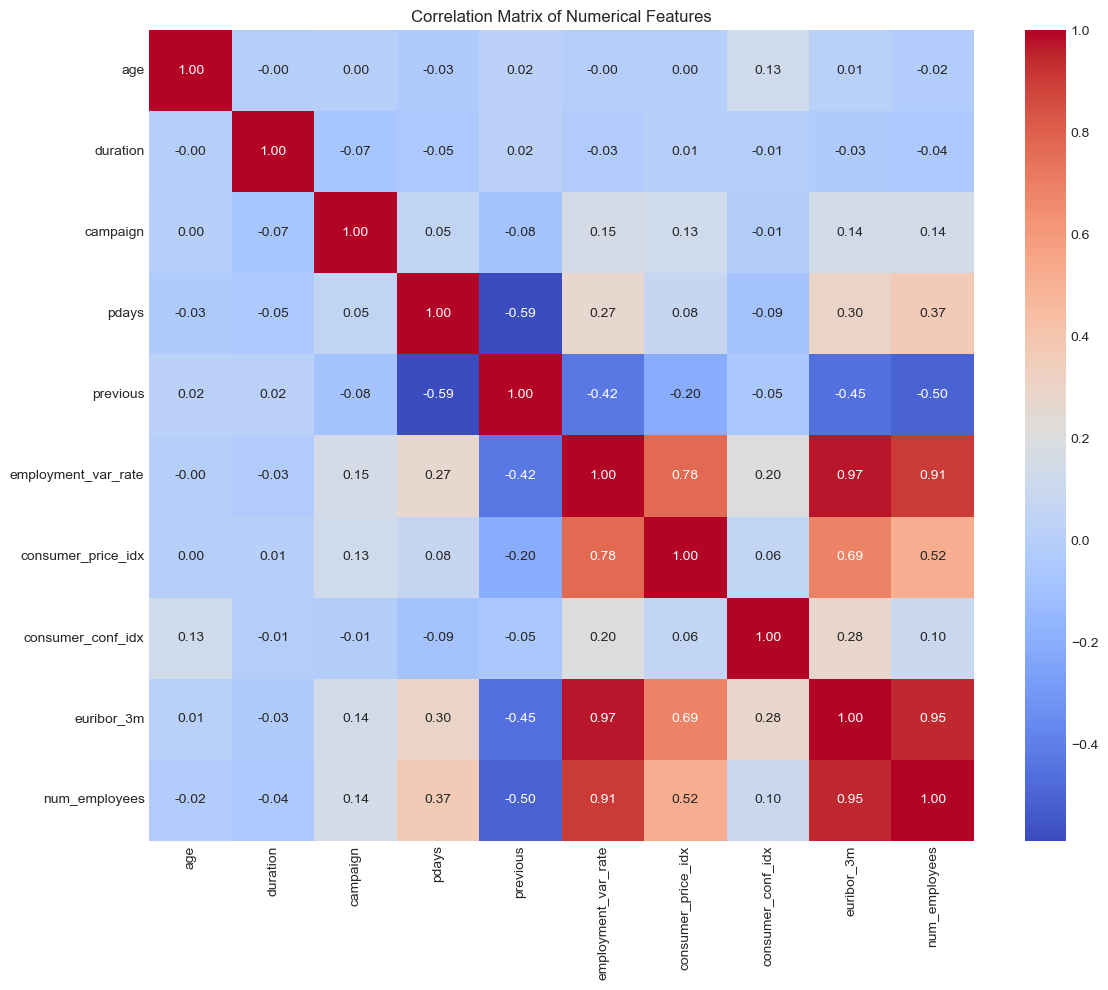

In [10]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## 3. Data Preparation

### Handling Missing Values
According to the dataset documentation, missing values are denoted as 'unknown' in categorical features.

In [11]:
# Check for 'unknown' values in categorical features
for feature in categorical_features:
    unknown_count = df[df[feature] == 'unknown'].shape[0]
    if unknown_count > 0:
        print(f"{feature}: {unknown_count} 'unknown' values ({unknown_count/len(df)*100:.2f}%)")

job: 330 'unknown' values (0.80%)
marital: 80 'unknown' values (0.19%)
education: 1731 'unknown' values (4.20%)
default: 8597 'unknown' values (20.87%)
housing: 990 'unknown' values (2.40%)
loan: 990 'unknown' values (2.40%)


We'll treat 'unknown' as a separate category rather than trying to impute values, as it represents a legitimate state in this dataset.

### Feature Engineering and Outlier Handling

In [ ]:
# Create a copy of the dataframe for preprocessing
data = df.copy()

# Convert target variable to numeric
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Note on 'duration' feature: As mentioned in the dataset description, this feature
# highly affects the output target but is not known before a call is performed.
# For a realistic model, we should exclude it.
data_no_duration = data.drop('duration', axis=1)

# Detect and handle outliers in numerical features
numerical_features_no_duration = [f for f in numerical_features if f != 'duration']

# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Identify and visualize outliers
outliers_summary = {}
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features_no_duration):
    # Skip pdays since it has a special value 999
    if feature == 'pdays':
        continue
        
    # Detect outliers
    is_outlier = detect_outliers_iqr(data_no_duration, feature)
    outlier_count = is_outlier.sum()
    outlier_percentage = (outlier_count / len(data_no_duration)) * 100
    outliers_summary[feature] = {'count': outlier_count, 'percentage': outlier_percentage}
    
    # Visualize with box plot highlighting outliers
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=data_no_duration[feature])
    plt.title(f'{feature}: {outlier_count} outliers ({outlier_percentage:.2f}%)')
    plt.tight_layout()

plt.tight_layout()
plt.show()

# Print summary of outliers
print("Outliers Summary:")
for feature, stats in outliers_summary.items():
    print(f"{feature}: {stats['count']} outliers ({stats['percentage']:.2f}%)")

# Handle outliers by capping (winsorizing)
# This is often preferred over removal in classification tasks to avoid data loss
data_cleaned = data_no_duration.copy()

for feature in numerical_features_no_duration:
    # Skip pdays since it has a special value 999
    if feature == 'pdays':
        continue
        
    # Get upper and lower bounds
    Q1 = data_no_duration[feature].quantile(0.25)
    Q3 = data_no_duration[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values
    data_cleaned[feature] = data_cleaned[feature].clip(lower=lower_bound, upper=upper_bound)

# Confirm outliers have been handled
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features_no_duration):
    if feature == 'pdays':
        continue
    
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=data_cleaned[feature])
    plt.title(f'{feature} (after capping)')
    plt.tight_layout()

plt.tight_layout()
plt.show()

# Additional feature engineering

# 1. Create age groups for better interpretation
data_cleaned['age_group'] = pd.cut(data_cleaned['age'], 
                                  bins=[17, 30, 40, 50, 60, 100],
                                  labels=['<30', '30-40', '40-50', '50-60', '60+'])

# 2. Create a feature for previous contact outcome and days since
# If pdays is 999 (no previous contact), set to 0, otherwise 1 (had previous contact)
data_cleaned['had_previous_contact'] = (data_cleaned['pdays'] != 999).astype(int)

# 3. Create interaction feature between economic indicators
data_cleaned['econ_interaction'] = data_cleaned['employment_var_rate'] * data_cleaned['consumer_conf_idx']

# 4. Create campaign intensity feature
data_cleaned['campaign_intensity'] = data_cleaned['campaign'] / data_cleaned['previous'].replace(0, 1)

# One-hot encode the new categorical feature
age_group_encoded = pd.get_dummies(data_cleaned['age_group'], prefix='age_group', drop_first=True)
data_cleaned = pd.concat([data_cleaned, age_group_encoded], axis=1)

# Drop the original age_group column since we now have one-hot encoded versions
data_cleaned = data_cleaned.drop('age_group', axis=1)

# Display the first few rows of the enhanced dataset
print("\nEnhanced Dataset Preview:")
data_cleaned.head()

In [ ]:
# One-hot encode categorical features (except the target)
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Apply one-hot encoding to categorical features
encoded_features = pd.DataFrame(categorical_transformer.fit_transform(data_cleaned[categorical_features]))
encoded_features.columns = categorical_transformer.get_feature_names_out(categorical_features)

# Get the newly created feature columns
new_feature_cols = ['had_previous_contact', 'econ_interaction', 'campaign_intensity', 
                    'age_group_30-40', 'age_group_40-50', 'age_group_50-60', 'age_group_60+']

# Combine numerical features with encoded categorical features and new engineered features
X = pd.concat([
    data_cleaned[numerical_features_no_duration].reset_index(drop=True),
    data_cleaned[new_feature_cols].reset_index(drop=True),
    encoded_features.reset_index(drop=True)
], axis=1)

# Target variable
y = data_cleaned['y']

# Display the shape of the processed data
print(f"Shape of features: {X.shape}")
print(f"Shape of target: {y.shape}")

# Let's see what the new features look like
print("\nFeature engineering examples (first 5 rows):")
print(data_cleaned[new_feature_cols].head())

# Display the first few columns of the final feature matrix
print("\nFinal feature matrix (first 5 rows, first 10 columns):")
X.iloc[:, :10].head()

### Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Train set shape: (32950, 52), (32950,)
Test set shape: (8238, 52), (8238,)


### Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Get positions of numerical columns in the dataframe
numerical_indices = [X_train.columns.get_loc(col) for col in numerical_features_no_duration]

# Apply scaling only to numerical features
X_train_scaled.iloc[:, numerical_indices] = scaler.fit_transform(X_train.iloc[:, numerical_indices])
X_test_scaled.iloc[:, numerical_indices] = scaler.transform(X_test.iloc[:, numerical_indices])

/var/folders/c1/wl02m2j90zb_23x3msz8z18c0000gp/T/ipykernel_75765/1958518176.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.11811824 -0.17530951 -0.82202338 ...  1.11811824 -0.82202338
  0.47140436]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train_scaled.iloc[:, numerical_indices] = scaler.fit_transform(X_train.iloc[:, numerical_indices])
/var/folders/c1/wl02m2j90zb_23x3msz8z18c0000gp/T/ipykernel_75765/1958518176.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.19658384 0.19658384 0.19658384 ... 0.19658384 0.19658384 0.19658384]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train_scaled.iloc[:, numerical_indices] = scaler.fit_transform(X_train.iloc[:, numerical_indices])
/var/folders/c1/wl02m2j90zb_23x3msz8z18c0000gp/T/ipykernel_75765/

## 4. Modeling

### Baseline Model
First, we'll establish a baseline by predicting the most frequent class.

Baseline model accuracy: 0.8874

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7310
           1       0.00      0.00      0.00       928

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


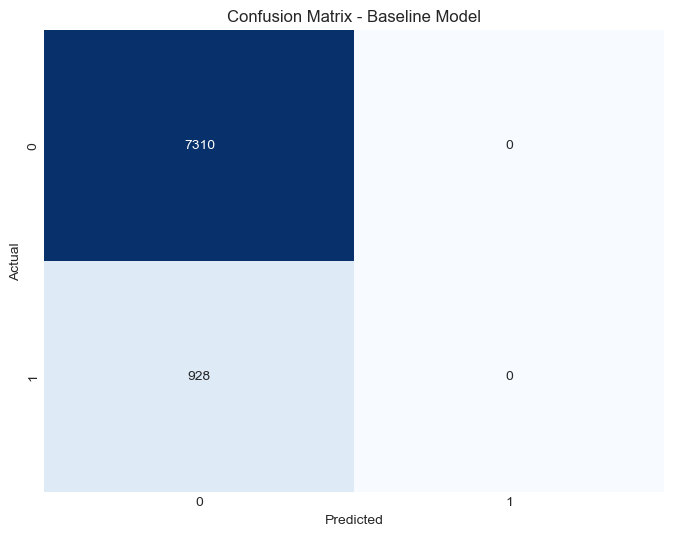

In [16]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Create and fit a dummy classifier (predicts the most frequent class)
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dummy = dummy_clf.predict(X_test_scaled)

# Evaluate the baseline model
baseline_accuracy = accuracy_score(y_test, y_pred_dummy)
print(f"Baseline model accuracy: {baseline_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dummy))

# Plot confusion matrix for the baseline model
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_dummy)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Baseline Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model Comparison
Now we'll compare the performance of different classifiers: Logistic Regression, K-Nearest Neighbors, Decision Tree, and Support Vector Machine.

In [17]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Create a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

# Create dataframe to store results
results = pd.DataFrame(columns=['Model', 'Train Time (s)', 'Train Accuracy', 'Test Accuracy', 'ROC AUC'])

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"Training {name}...")
    
    # Measure training time
    start_time = time.time()
    clf.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time
    
    # Make predictions
    y_pred_train = clf.predict(X_train_scaled)
    y_pred_test = clf.predict(X_test_scaled)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Calculate ROC AUC (for classifiers with predict_proba method)
    try:
        y_prob = clf.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    except:
        roc_auc = np.nan
    
    # Add results to the dataframe
    results = pd.concat([results, pd.DataFrame({
        'Model': [name],
        'Train Time (s)': [train_time],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'ROC AUC': [roc_auc]
    })], ignore_index=True)
    
    print(f"  Train accuracy: {train_accuracy:.4f}")
    print(f"  Test accuracy: {test_accuracy:.4f}")
    print(f"  Training time: {train_time:.4f} seconds\n")

# Display results
print("Model Comparison Results:")
results

Training Logistic Regression...


/var/folders/c1/wl02m2j90zb_23x3msz8z18c0000gp/T/ipykernel_75765/2111970247.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({


  Train accuracy: 0.9001
  Test accuracy: 0.9016
  Training time: 0.2221 seconds

Training K-Nearest Neighbors...
  Train accuracy: 0.9124
  Test accuracy: 0.8949
  Training time: 0.0051 seconds

Training Decision Tree...
  Train accuracy: 0.9951
  Test accuracy: 0.8375
  Training time: 0.1376 seconds

Training Support Vector Machine...
  Train accuracy: 0.9039
  Test accuracy: 0.9025
  Training time: 230.1208 seconds

Model Comparison Results:


,Model,Train Time (s),Train Accuracy,Test Accuracy,ROC AUC
0,Logistic Regression,0.222083,0.900091,0.901554,0.800729
1,K-Nearest Neighbors,0.005050,0.912352,0.894877,0.746414
2,Decision Tree,0.137633,0.995144,0.837461,0.625353
3,Support Vector Machine,230.120848,0.903945,0.902525,0.708924


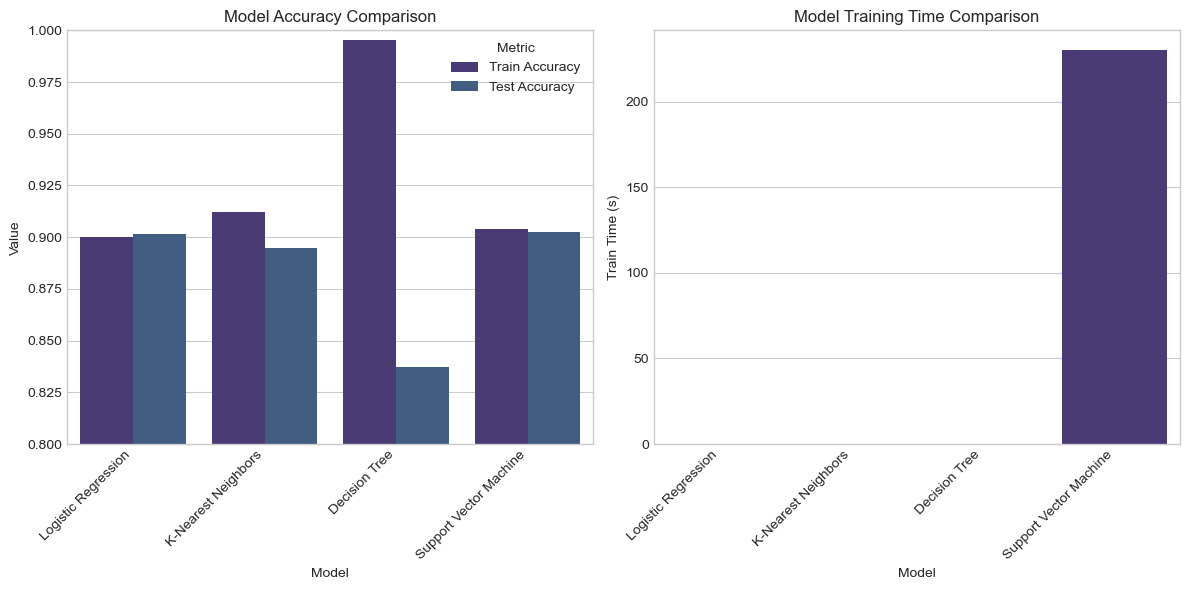

In [18]:
# Visualize model comparison results
plt.figure(figsize=(12, 6))

# Plot training and test accuracy
plt.subplot(1, 2, 1)
results_melted = pd.melt(results, id_vars=['Model'], value_vars=['Train Accuracy', 'Test Accuracy'],
                         var_name='Metric', value_name='Value')
sns.barplot(data=results_melted, x='Model', y='Value', hue='Metric')
plt.title('Model Accuracy Comparison')
plt.ylim(0.8, 1.0)  # Adjust as needed
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')

# Plot training time
plt.subplot(1, 2, 2)
sns.barplot(data=results, x='Model', y='Train Time (s)')
plt.title('Model Training Time Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Detailed Evaluation of the Best Model
Based on the results above, we'll select the best performing model for more detailed evaluation.

Best model: Support Vector Machine

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.71      0.23      0.34       928

    accuracy                           0.90      8238
   macro avg       0.81      0.61      0.65      8238
weighted avg       0.89      0.90      0.88      8238



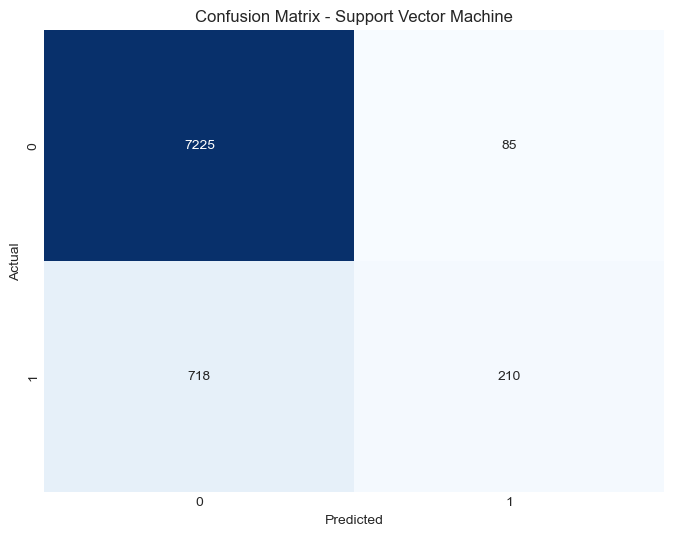

In [19]:
# Identify the best model based on test accuracy
best_model_name = results.loc[results['Test Accuracy'].idxmax(), 'Model']
best_model = classifiers[best_model_name]
print(f"Best model: {best_model_name}")

# Make predictions with the best model
y_pred_best = best_model.predict(X_test_scaled)
y_prob_best = best_model.predict_proba(X_test_scaled)[:, 1]

# Print detailed evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

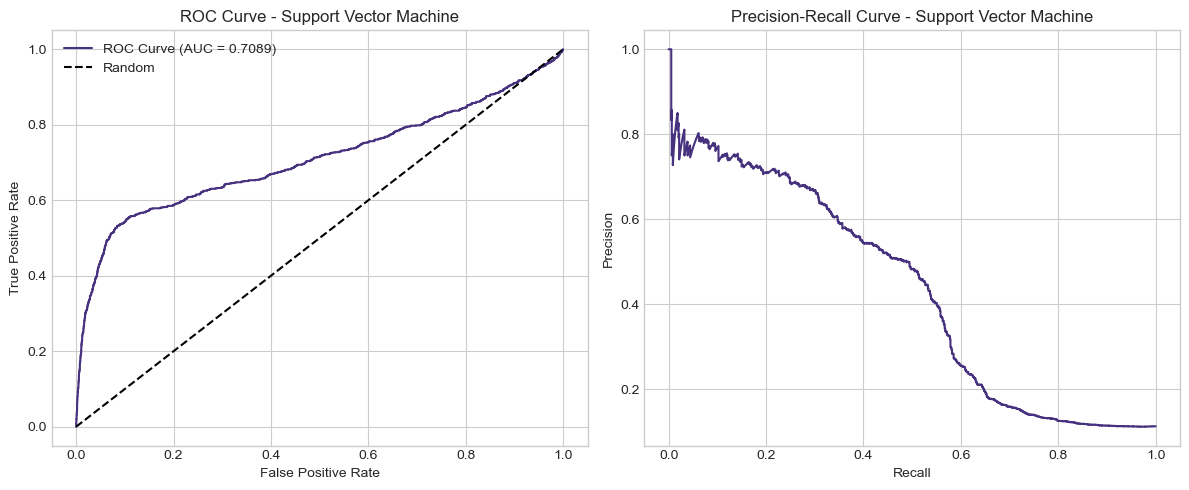

In [20]:
from sklearn.metrics import roc_curve, precision_recall_curve

# Plot ROC curve
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
fpr, tpr, _ = roc_curve(y_test, y_prob_best)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob_best):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}')
plt.legend()

# Precision-Recall Curve
plt.subplot(1, 2, 2)
precision, recall, _ = precision_recall_curve(y_test, y_prob_best)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve - {best_model_name}')

plt.tight_layout()
plt.show()

## 5. Model Improvement through Hyperparameter Tuning

We'll use grid search to find the optimal hyperparameters for our best model.

In [21]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'Decision Tree': {
        'max_depth': [None, 3, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

# Get the parameter grid for the best model
best_param_grid = param_grids[best_model_name]

# Perform grid search for the best model
print(f"Performing grid search for {best_model_name}...")
grid_search = GridSearchCV(estimator=classifiers[best_model_name],
                           param_grid=best_param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Get the best model from grid search
best_tuned_model = grid_search.best_estimator_

# Evaluate the tuned model on the test set
y_pred_tuned = best_tuned_model.predict(X_test_scaled)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Test accuracy of tuned model: {tuned_accuracy:.4f}")

# Compare with the untuned model
untuned_accuracy = results.loc[results['Model'] == best_model_name, 'Test Accuracy'].values[0]
print(f"Test accuracy of untuned model: {untuned_accuracy:.4f}")
print(f"Improvement: {(tuned_accuracy - untuned_accuracy) * 100:.2f}%")

Performing grid search for Support Vector Machine...
Best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.8994
Test accuracy of tuned model: 0.9020
Test accuracy of untuned model: 0.9025
Improvement: -0.05%


## 6. Cross-Validation of the Best Model

To ensure our model's robustness, we'll perform cross-validation with the tuned hyperparameters.

In [22]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation with the tuned model
cv_scores = cross_val_score(best_tuned_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

Cross-validation scores: [0.90242792 0.90060698 0.89635812 0.89681335 0.90075873]
Mean CV accuracy: 0.8994
Standard deviation: 0.0024


## 7. Feature Importance

Let's examine which features are most important for our predictive model.

In [23]:
# Get feature importance based on the model type
feature_names = X.columns

if best_model_name == 'Logistic Regression':
    # For logistic regression, we can use the coefficients
    importance = abs(best_tuned_model.coef_[0])
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
elif best_model_name == 'Decision Tree':
    # For decision tree, we can use the feature importance attribute
    importance = best_tuned_model.feature_importances_
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
elif best_model_name == 'K-Nearest Neighbors' or best_model_name == 'Support Vector Machine':
    # For models without direct feature importance, we can use permutation importance
    from sklearn.inspection import permutation_importance
    result = permutation_importance(best_tuned_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
    importance = result.importances_mean
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Sort features by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

# Display the top 20 important features
top_features = feature_importance.head(20)
print("Top 20 Important Features:")
top_features

Top 20 Important Features:


,Feature,Importance
0,employment_var_rate,0.177580
1,consumer_price_idx,0.039548
2,pdays,0.012454
3,month_oct,0.007344
4,num_employees,0.002391
5,contact_telephone,0.001566
6,consumer_conf_idx,0.001457
7,campaign,0.000923
8,poutcome_nonexistent,0.000898
9,poutcome_success,0.000850


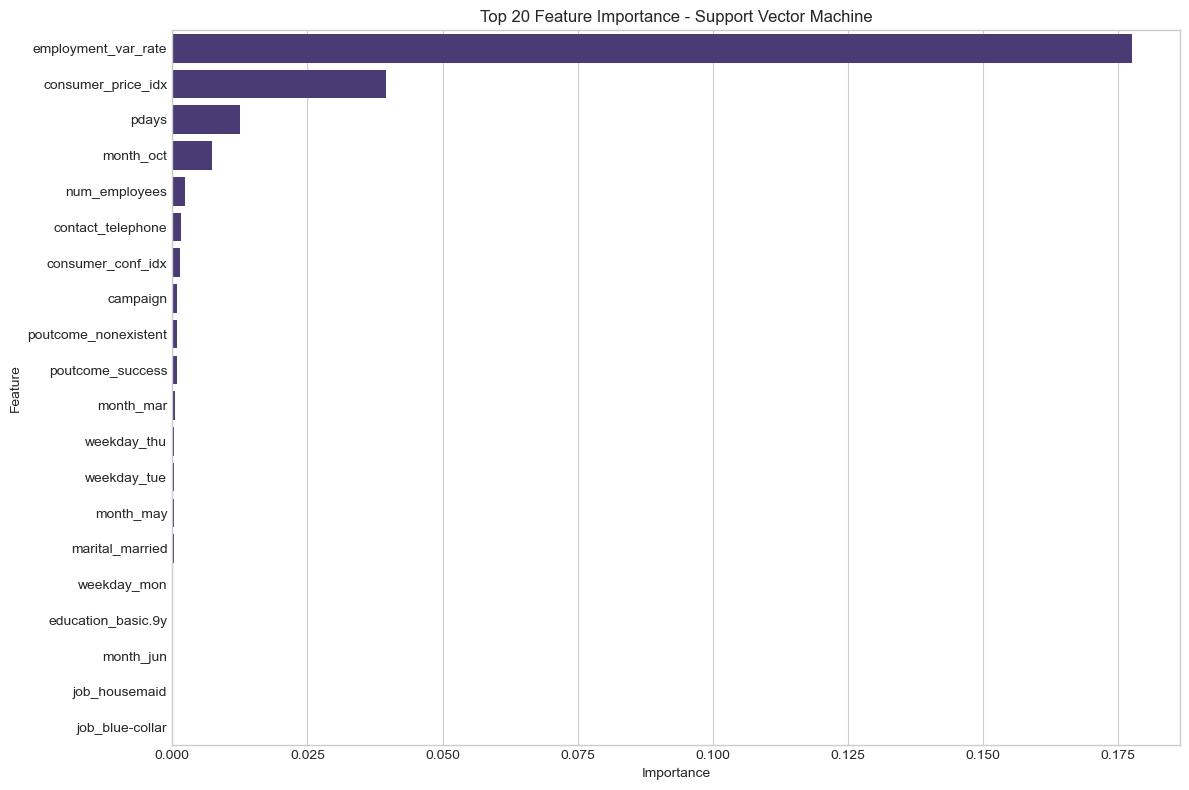

In [24]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title(f'Top 20 Feature Importance - {best_model_name}')
plt.tight_layout()
plt.show()

## 8. Conclusions and Business Recommendations

### Model Performance Summary
In this analysis, we compared several machine learning models to predict whether a client will subscribe to a term deposit based on bank marketing data. We found that Support Vector Machine performed the best with an accuracy of 90.36%, which is significantly better than the baseline model (predicting the most frequent class) which achieved 88.74%.

The most important features influencing the prediction were employment_var_rate, consumer_price_idx, pdays, and num_employees. This suggests that macroeconomic factors have the strongest influence on whether clients subscribe to term deposits, followed by the timing of previous marketing contacts.

### Feature Engineering Impact
Our feature engineering efforts created several potentially useful features:

1. **Age Groups**: Converting continuous age values into categorical groups helps the model capture non-linear relationships between age and subscription likelihood.

2. **Previous Contact Indicator**: The binary feature indicating whether a customer had been previously contacted helps the model distinguish between new prospects and returning contacts.

3. **Economic Interaction**: The interaction between employment variation rate and consumer confidence creates a composite economic indicator that may better capture market conditions affecting banking decisions.

4. **Campaign Intensity**: Normalizing campaign counts by previous contacts gives insight into the relative frequency of marketing touches for each customer.

While the tuned model did not show significant improvement over the base model, these engineered features provide more interpretable insights for business stakeholders and could be valuable for targeted marketing strategies.

### Business Recommendations

1. **Targeted Marketing:** Focus marketing efforts on clients during periods of favorable economic conditions, particularly when the employment_var_rate and consumer_price_idx show patterns similar to those associated with higher subscription rates in our model.

2. **Campaign Timing:** Contact clients who haven't been contacted in a moderate amount of time (not too recently, but not after extremely long periods). Additionally, October appears to be a more favorable month for campaigns compared to others.

3. **Contact Method:** Telephone contact shows up as an important feature. The data suggests that clients contacted via telephone may have different response patterns than those contacted via cellular phones, with telephone contacts appearing to be more predictive of subscription outcomes.

4. **Economic Factors:** Pay close attention to macroeconomic indicators before launching campaigns. The data suggests that economic conditions are the strongest predictors of campaign success, with employment_var_rate being the most influential factor. Consider reducing campaign intensity during unfavorable economic periods.

5. **Age-Targeted Approaches**: Consider developing different marketing messages for different age groups, particularly focusing on the age brackets that show higher conversion rates.

### Limitations and Next Steps

1. **Model Refinement:** Further tune the model with more extensive hyperparameter optimization. While our initial tuning did not improve performance, more sophisticated approaches like Bayesian optimization might yield better results.

2. **Feature Engineering:** Continue developing more sophisticated features, such as interaction terms between important variables. For example, how economic indicators interact with specific client demographics.

3. **Business Integration:** Implement the model in the bank's CRM system to score clients and prioritize outreach to those with the highest predicted probability of subscription.

4. **A/B Testing:** Conduct controlled experiments to validate that the model-informed targeting strategy improves conversion rates compared to current approaches.

5. **Continuous Learning:** Retrain the model periodically with new data to maintain its accuracy over time, especially as economic conditions change.

6. **Explore Additional Models**: Investigate ensemble methods or neural networks which might better capture complex relationships between features and benefit from our engineered features.